<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/3_5_2_%EB%B3%91%ED%95%A9_%EA%B5%B0%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=4823f938f7a6916148f9584123d76ef41355ab8e20bc343270d243a81f80e437
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits

from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer


import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(12,8)})

from pandas.core.common import random_state

# 3.5.2 병합군집
병합 군집은 다음과 같다.
병합 군집은 시작할때 각 포인트를 하나의 클러스터로 지정하고, 그다음 어떤 종료조건을 만족할 때가지 가장 비슷한 두 클러스터를 합쳐나간다. 종료조건은 지정된 클러스터가 남을 때 가지이다.

- ward
- average
- complete

ward 기본값, 대부분에 데이터셋에 알맞음
avg, cop 는 한 클러스터가 다른 것보다 매우 클 때 더 나을 수 있다.

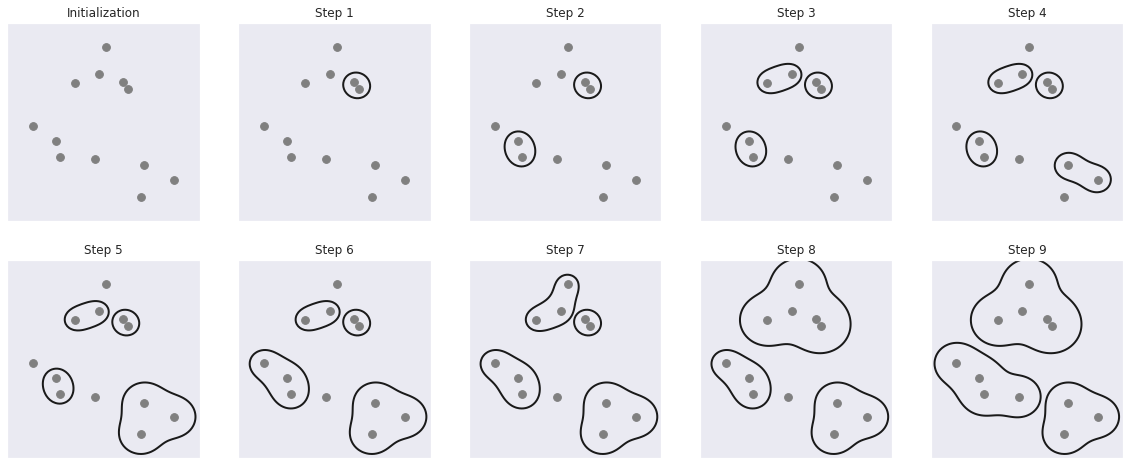

In [3]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'feature 1')

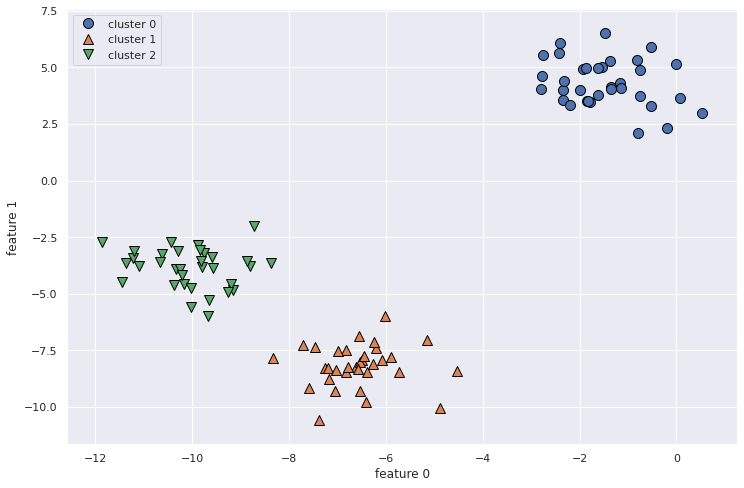

In [4]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:,1], assignment)
plt.legend(['cluster 0','cluster 1','cluster 2'], loc='best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

계층적 군집과 덴드로그램
병합군집은 계층적 군집을 만든다. 다음은 각 클러스터가 더 작은 클러스터로 어떻게 나뉘는지 잘 보여준다.

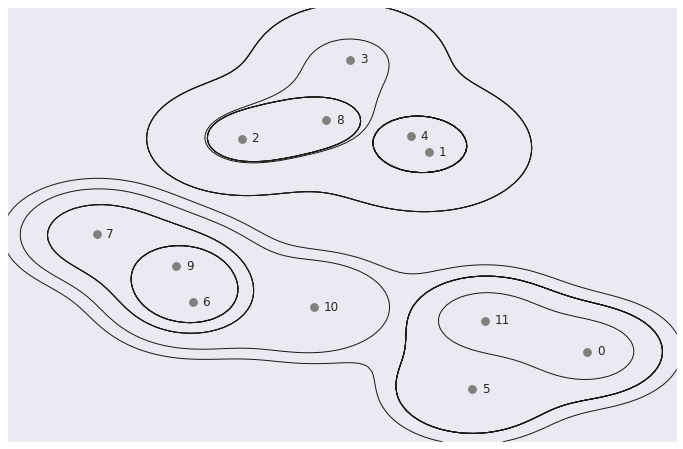

In [5]:
mglearn.plots.plot_agglomerative()

2차원 이상의 계층군집을 시각화하는 건 scikit-learn에서 아직 구연되지 않았다. 
그러나 Scipy 알고리즘은, 덴드로그램 그래프를 그려보여줄 수 있다.

Text(0, 0.5, 'cluster distence')

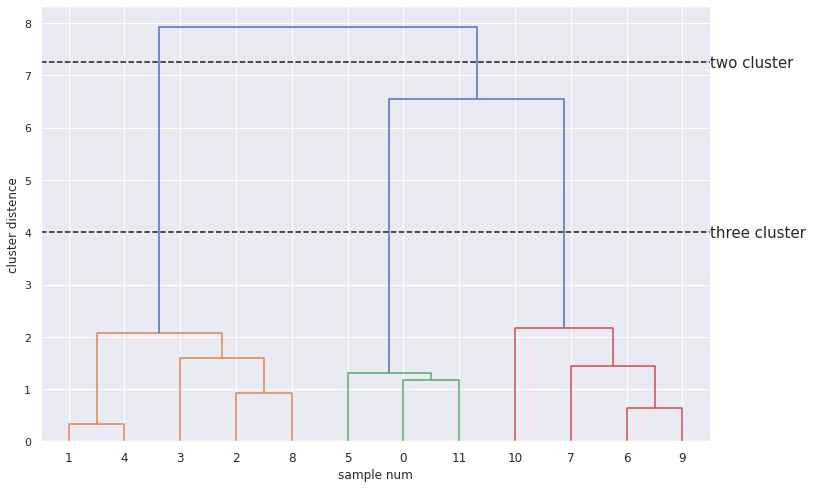

In [6]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트한다.
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X에 ward 함수를 적용한다.
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 답긴 배열을 반환한다.
linkage_array = ward(X)
# 덴드로그램을 그린다.
dendrogram(linkage_array)

# 두 개와 세개의 클러스터를 구분하는 커트라인을 표시한다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two cluster', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, 'three cluster', va='center', fontdict={'size':15})
plt.xlabel('sample num')
plt.ylabel('cluster distence')

scikit 0.24 버전에서 덴드로그램 함수를 그릴수 있게 되었다. 

In [7]:
agg = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
agg.fit(X)

print(agg.children_)

[[ 1  4]
 [ 6  9]
 [ 2  8]
 [ 0 11]
 [ 5 15]
 [ 7 13]
 [ 3 14]
 [12 18]
 [10 17]
 [16 20]
 [19 21]]


Text(0, 0.5, 'cluster distence')

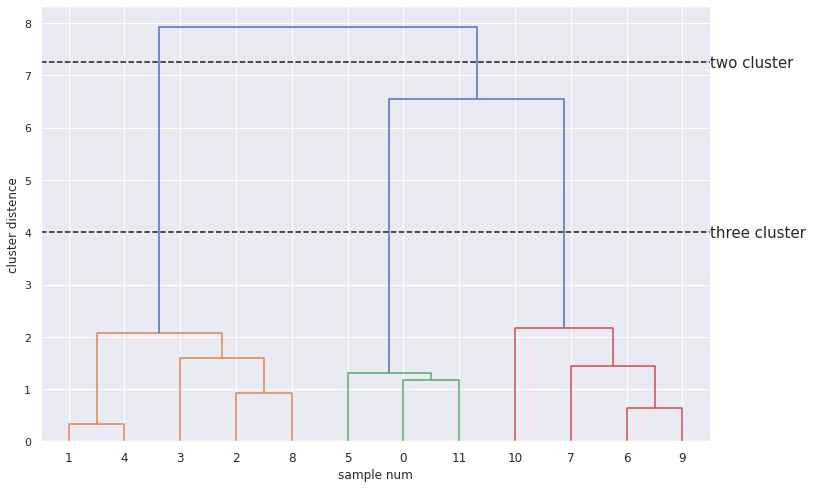

In [8]:
counts = np.zeros(agg.children_.shape[0])
n_samples = len(agg.labels_)
for i, merge in enumerate(agg.children_):
  current_count = 0
  for child_idx in merge:
    if child_idx < n_samples:
      current_count += 1 # 리프 노트
    else:
      current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([agg.children_, agg.distances_, counts])
# 클러스터 간의 거리 정보가 담긴 linkage matrix를 사용해 덴드로그램을 그린다.
dendrogram(linkage_matrix)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시한다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two cluster', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, 'three cluster', va='center', fontdict={'size':15})
plt.xlabel('sample num')
plt.ylabel('cluster distence')

## 3.5.3 DBSCAN

#### 장점
- 클러스터의 개수를 미리 지정할 필요없다.
- 복잡한 형상도 찾을 수 있다
- 어느 클래스에도 속하지 않는 포인트를 구분 가능하다

#### 포인트 종류
- 핵심 포인트(밀집지역에 포인트)
- 경계 포인트(핵심 포인트 에서 eps 거리 안에 있는 포인트)
- 잡음 포인트(따로 떨어진 일정 수 이하의 포인트)

In [9]:
from scipy import cluster
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("cluster label: \n", clusters)

# 작은 샘플이라 잡음포인트를 의미하는 -1 레이블이 할당되었다.
# 이는 데이터 샘플이 적합하지 않는 eps, n_samples 기본값 때문이다

cluster label: 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


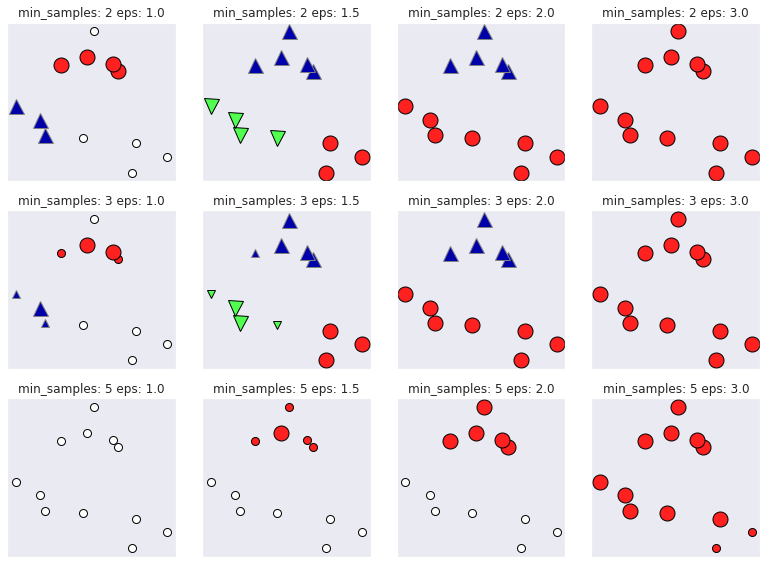

In [11]:
mglearn.plots.plot_dbscan()

eps 거리 안에 min_samples 보다 많은 포인트가 있으면 핵심으로 구분, 아니면 잡음으로 구분한다.
DBSCAN 은 크러스터의 개수를 지정할 필요는 없지만, eps 값은 간접적으로 몇 개의 클러스터가 만들어질지 제어한다. 적합한 eps 값을 쉽게 찾으려면 StandardScaler나  MinMaxScaler 로 모든 특성의 스케일을 비슷한 범위로 조정해주는 것이 좋다.

Text(0, 0.5, 'feature 1')

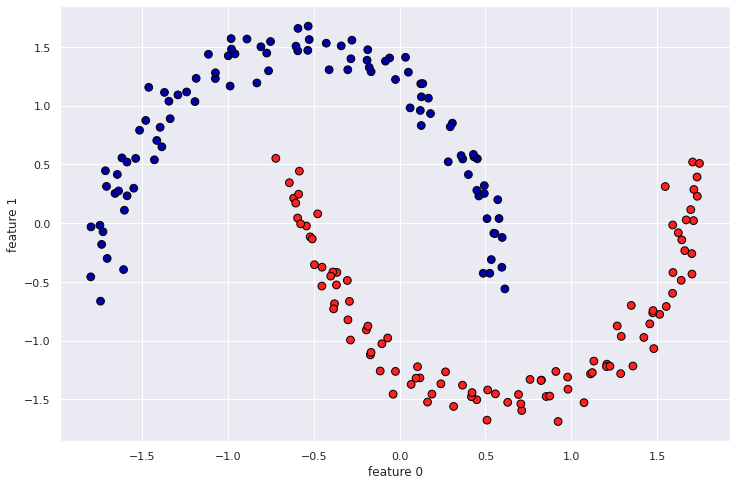

In [12]:
# two_moons 데이터셋에 DBSCAM을 적용한 결과이다. 이 알고리즘은 기본 설정값으로 두 개의 반달 모양을 정확히 찾아 구분한다.

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정한다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시한다.
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

기본 매개변수 설정이 잘 맞는다. 만약 eps 값을 기본값이 0.5에서 0.2로 내린다면 너무 많은 8개의 클러스터를 만들어 내며, 0.7로 올린다면 1개의 클러스터를 만든다.

\
## 3.5.4 군집 알고리즘의 비교와 평가
군집 알고리즘을 적용하는 데 어려운 점 하나는 알고리즘이 잘 작동하는지 평가하거나 여러 알고리즘의 출력을 비교하기가 매우 어렵다는 것이다.

\
#### 타깃 값으로 군집 평가하기
군집 알고리즘의 결과를 실제 정답 클러스터와 비교하여 평가할 수 있는 지표들이 있다. ARI, NMI가 가장 널리 이용된다.

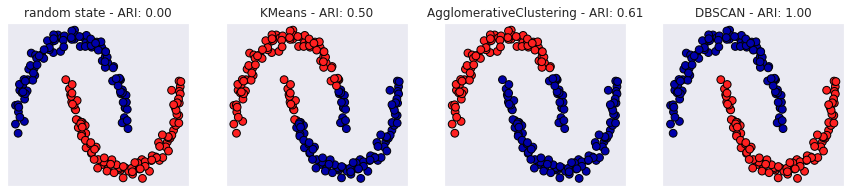

In [21]:
# ARI를 이용해 k-평군, 병합군집, DBSCAM 알고리즘을 비교한다
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 테이터의 스케일을 조정한다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만든다.
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당한다.
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그린다.
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
axes[0].set_title("random state - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
  # 클러스터 할당과 클러스터 중심을 그린다.
  clusters= algorithm.fit_predict(X_scaled)
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
  ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))